# BigFive Personality dataset

In [2]:
!pip install pandas
!pip install kagglehub[pandas-datasets]

In [3]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "IPIP-FFM-data-8Nov2018/data-final.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tunguz/big-five-personality-test",
  file_path,
  pandas_kwargs={"delimiter": "\t"}
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



/tmp/ipython-input-3-3133513650.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 159M/159M [00:02<00:00, 66.2MB/s]

Extracting zip of data-final.csv...


In [65]:
# Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox
from scipy.stats import boxcox_normmax
import statsmodels.api as sm
from scipy.stats import pearsonr

## 1. Summery of dataset

In [5]:
print("First 5 records:", df.head())

First 5 records:    EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1      

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB
None


In [ ]:
print(df.describe())

               EXT1          EXT2          EXT3          EXT4          EXT5  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.648067e+00  2.773115e+00  3.288349e+00  3.140595e+00  3.276960e+00   
std    1.264407e+00  1.323943e+00  1.215006e+00  1.237442e+00  1.277593e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%    4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.401100e+00  2.771744e+00  3.414818e+00  2.963740e+00  3.556469e+00   
std    1.225721e+00  1.400336e+00  1.271915e+00  1.

In [ ]:
df.isnull().sum()


EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [ ]:
(df.isnull().sum()/(len(df)))*10

EXT1                     0.017561
EXT2                     0.017561
EXT3                     0.017561
EXT4                     0.017561
EXT5                     0.017561
                           ...   
endelapse                0.000000
IPC                      0.000000
country                  0.000758
lat_appx_lots_of_err     0.000000
long_appx_lots_of_err    0.000000
Length: 110, dtype: float64

## Data cleaning

In [6]:
# Filter for unique users
df_unique = df[df['IPC'] == 1].copy()


In [7]:
# Check for missing values in each column
missing_counts = df_unique.isnull().sum()
print(missing_counts)

# Option: Drop rows with any missing personality item responses
personality_cols = [col for col in df_unique.columns if any(trait in col for trait in ['EXT', 'EST', 'AGR', 'CSN', 'OPN']) and not col.endswith('_E')]
df_clean = df_unique.dropna(subset=personality_cols)

EXT1                     1141
EXT2                     1141
EXT3                     1141
EXT4                     1141
EXT5                     1141
                         ... 
endelapse                   0
IPC                         0
country                    67
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64


### this is the data where *null* values are deleted reducing the whole data from  1015340 target rows to  695703 which may cause data loss

In [ ]:
df_clean

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
5         3.0   3.0   4.0   2.0   4.0   2.0   2.0   3.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015334   4.0   1.0   4.0   2.0   4.0   3.0   3.0   2.0   3.0    2.0  ...   
1015335   5.0   1.0   5.0   2.0   4.0   2.0   3.0   1.0   5.0    1.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
0        2016-03-03 02:01:01    768.0   1024.0          9.0       234.0   
1        2016-03-03 02:01:20   1360.0    768.0         12.0       179.0   
2        2016-03-03 02:01:56   1366.0    768.0          3.0       186.0   
3        2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0   
5        2016-03-03 02:03:12   1600.0   1000.0          4.0       196.0   
...                      ...      ...      ...          ...         ...   
1015334  2018-11-08 12:02:14   2560.0   1080.0         36.0       209.0   
1015335  2018-11-08 12:02:38    375.0    667.0         10.0       245.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0                6    1       GB               51.5448                 0.1991  
1               11    1       MY                3.1698                101.706  
2                7    1       GB               54.9119                -1.3833  
3                7    1       GB                 51.75                  -1.25  
5                3    1       SE               59.3333                  18.05  
...            ...  ...      ...                   ...                    ...  
1015334         16    1       GB               52.4189                -1.5054  
1015335          9    1       TR               41.0186                28.9647  
1015337          7    1       US                  38.0                  -97.0  
1015339          8    1       US               34.1067              -117.8067  
1015340          9    1       US                  38.0                  -97.0  

[695704 rows x 110 columns]

### Here we are using *data_fillin* for our observations

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use **fillna() and** **method='ffill',** which fills the last observed non-null value forward until another non-null value is encountered.

In [8]:
data = df.fillna(method='ffill')

/tmp/ipython-input-8-4192118017.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


### this is the data where null values are replace by fillin_funciton carries the risk of introducing bias or inaccuracies .

In [9]:
data_fillin = data
data_fillin


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
0        2016-03-03 02:01:01    768.0   1024.0          9.0       234.0   
1        2016-03-03 02:01:20   1360.0    768.0         12.0       179.0   
2        2016-03-03 02:01:56   1366.0    768.0          3.0       186.0   
3        2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0   
4        2016-03-03 02:02:57   1366.0    768.0          8.0       315.0   
...                      ...      ...      ...          ...         ...   
1015336  2018-11-08 12:04:58   1920.0   1080.0          3.0       160.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015338  2018-11-08 12:07:49   1920.0   1080.0          2.0       135.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0                6    1       GB               51.5448                 0.1991  
1               11    1       MY                3.1698                101.706  
2                7    1       GB               54.9119                -1.3833  
3                7    1       GB                 51.75                  -1.25  
4               17    2       KE                   1.0                   38.0  
...            ...  ...      ...                   ...                    ...  
1015336         10    2       US               39.9883               -75.2208  
1015337          7    1       US                  38.0                  -97.0  
1015338         12    6       US               36.1473                -86.777  
1015339          8    1       US               34.1067              -117.8067  
1015340          9    1       US                  38.0                  -97.0  

[1015341 rows x 110 columns]

Some of the given items are negatively scored so we have to change them for positive scoring

In [10]:
# Define reverse-scored items for each trait
reverse_items = {
    'EXT': ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10'],
    'EST': ['EST2', 'EST4'],
    'AGR': ['AGR1', 'AGR3', 'AGR5', 'AGR7'],
    'CSN': ['CSN2', 'CSN4', 'CSN6', 'CSN8'],
    'OPN': ['OPN2', 'OPN4', 'OPN6']
}

# Reverse-score: new_value = 6 - original_value
for items in reverse_items.values():
    for item in items:
        data_fillin[item] = 6 - data_fillin[item]

data_fillin

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   5.0   5.0   4.0   5.0   5.0   5.0   4.0   4.0    5.0  ...   
1         3.0   1.0   3.0   2.0   3.0   3.0   2.0   1.0   1.0    1.0  ...   
2         2.0   3.0   4.0   2.0   3.0   4.0   1.0   3.0   2.0    1.0  ...   
3         2.0   4.0   2.0   3.0   4.0   4.0   2.0   2.0   1.0    2.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   1.0   3.0    2.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   4.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   2.0   3.0    3.0  ...   
1015338   4.0   4.0   4.0   3.0   5.0   5.0   4.0   4.0   4.0    2.0  ...   
1015339   2.0   2.0   3.0   2.0   2.0   4.0   1.0   2.0   2.0    2.0  ...   
1015340   4.0   4.0   4.0   4.0   4.0   5.0   4.0   4.0   4.0    2.0  ...   

                    dateload  screenw  screenh  introelapse  testelapse  \
0        2016-03-03 02:01:01    768.0   1024.0          9.0       234.0   
1        2016-03-03 02:01:20   1360.0    768.0         12.0       179.0   
2        2016-03-03 02:01:56   1366.0    768.0          3.0       186.0   
3        2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0   
4        2016-03-03 02:02:57   1366.0    768.0          8.0       315.0   
...                      ...      ...      ...          ...         ...   
1015336  2018-11-08 12:04:58   1920.0   1080.0          3.0       160.0   
1015337  2018-11-08 12:07:18   1920.0   1080.0          3.0       122.0   
1015338  2018-11-08 12:07:49   1920.0   1080.0          2.0       135.0   
1015339  2018-11-08 12:08:34   1920.0   1080.0          6.0       212.0   
1015340  2018-11-08 12:08:45   1920.0   1080.0          3.0       176.0   

         endelapse  IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0                6    1       GB               51.5448                 0.1991  
1               11    1       MY                3.1698                101.706  
2                7    1       GB               54.9119                -1.3833  
3                7    1       GB                 51.75                  -1.25  
4               17    2       KE                   1.0                   38.0  
...            ...  ...      ...                   ...                    ...  
1015336         10    2       US               39.9883               -75.2208  
1015337          7    1       US                  38.0                  -97.0  
1015338         12    6       US               36.1473                -86.777  
1015339          8    1       US               34.1067              -117.8067  
1015340          9    1       US                  38.0                  -97.0  

[1015341 rows x 110 columns]

Dropping less likely useful columns

In [11]:
data_new = data_fillin.drop(columns=['screenh', 'screenw', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'])

For Better understanding of the BIG FIVE we are taking the average values or mean of the big five traids
example
EXT = mean of [EXT1	EXT2	EXT3	EXT4	EXT5	EXT6	EXT7	EXT8	EXT9	EXT10	]

In [12]:
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
for trait in traits:
    items = [f'{trait}{i}' for i in range(1, 11)]
    data_new[f'{trait}_score'] = data_new[items].mean(axis=1)

In [ ]:
data_new

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   5.0   5.0   4.0   5.0   5.0   5.0   4.0   4.0    5.0  ...   
1         3.0   1.0   3.0   2.0   3.0   3.0   2.0   1.0   1.0    1.0  ...   
2         2.0   3.0   4.0   2.0   3.0   4.0   1.0   3.0   2.0    1.0  ...   
3         2.0   4.0   2.0   3.0   4.0   4.0   2.0   2.0   1.0    2.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   1.0   3.0    2.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   4.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   2.0   3.0    3.0  ...   
1015338   4.0   4.0   4.0   3.0   5.0   5.0   4.0   4.0   4.0    2.0  ...   
1015339   2.0   2.0   3.0   2.0   2.0   4.0   1.0   2.0   2.0    2.0  ...   
1015340   4.0   4.0   4.0   4.0   4.0   5.0   4.0   4.0   4.0    2.0  ...   

         introelapse  testelapse  endelapse  IPC  country  EXT_score  \
0                9.0       234.0          6    1       GB        4.6   
1               12.0       179.0         11    1       MY        2.0   
2                3.0       186.0          7    1       GB        2.5   
3              186.0       219.0          7    1       GB        2.6   
4                8.0       315.0         17    2       KE        2.9   
...              ...         ...        ...  ...      ...        ...   
1015336          3.0       160.0         10    2       US        3.4   
1015337          3.0       122.0          7    1       US        3.2   
1015338          2.0       135.0         12    6       US        3.9   
1015339          6.0       212.0          8    1       US        2.2   
1015340          3.0       176.0          9    1       US        3.9   

         EST_score  AGR_score  CSN_score  OPN_score  
0              2.4        3.9        3.2        4.5  
1              2.5        4.4        3.7        3.5  
2              2.6        4.2        3.4        4.1  
3              2.9        3.8        2.5        3.9  
4              1.9        4.6        4.8        4.8  
...            ...        ...        ...        ...  
1015336        3.3        3.8        3.1        3.3  
1015337        4.4        3.9        2.8        4.5  
1015338        2.9        3.5        1.9        4.8  
1015339        3.5        3.7        3.8        4.1  
1015340        2.9        4.2        2.8        4.7  

[1015341 rows x 111 columns]

### Encode Categorical Variables
Convert country to a numeric code for better machine understanding

In [13]:
data_new['country_code'] = data_new['country'].astype('category').cat.codes

In [ ]:
data_new.describe()


EXT1          EXT2          EXT3          EXT4          EXT5  \
count  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06   
mean   2.648192e+00  3.227117e+00  3.288601e+00  2.859536e+00  3.277319e+00   
std    1.264317e+00  1.323890e+00  1.214880e+00  1.237366e+00  1.277492e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
25%    2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%    4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max    5.000000e+00  6.000000e+00  5.000000e+00  6.000000e+00  5.000000e+00   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06   
mean   3.599006e+00  2.771969e+00  2.585250e+00  2.963820e+00  2.443806e+00   
std    1.225599e+00  1.400269e+00  1.271855e+00  1.345968e+00  1.305251e+00   
min    1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    3.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  1.000000e+00   
50%    4.000000e+00  3.000000e+00  2.000000e+00  3.000000e+00  2.000000e+00   
75%    5.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  3.000000e+00   
max    6.000000e+00  5.000000e+00  6.000000e+00  5.000000e+00  6.000000e+00   

       ...   introelapse    testelapse     endelapse           IPC  \
count  ...  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06   
mean   ...  9.651896e+02  6.796953e+02  2.701410e+03  1.045211e+01   
std    ...  5.103846e+04  2.017348e+04  1.483898e+06  3.982879e+01   
min    ...  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    ...  5.000000e+00  1.710000e+02  9.000000e+00  1.000000e+00   
50%    ...  1.000000e+01  2.240000e+02  1.300000e+01  1.000000e+00   
75%    ...  3.000000e+01  3.140000e+02  1.800000e+01  2.000000e+00   
max    ...  2.944307e+07  1.189272e+07  1.493327e+09  7.250000e+02   

          EXT_score     EST_score     AGR_score     CSN_score     OPN_score  \
count  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06   
mean   2.966461e+00  3.058337e+00  3.759220e+00  3.354367e+00  3.871616e+00   
std    9.043762e-01  8.611834e-01  7.321350e-01  7.369890e-01  6.458535e-01   
min    5.000000e-01  4.000000e-01  8.000000e-01  6.000000e-01  9.000000e-01   
25%    2.300000e+00  2.400000e+00  3.300000e+00  2.800000e+00  3.400000e+00   
50%    3.000000e+00  3.100000e+00  3.800000e+00  3.400000e+00  3.900000e+00   
75%    3.600000e+00  3.700000e+00  4.300000e+00  3.900000e+00  4.400000e+00   
max    5.500000e+00  5.200000e+00  5.200000e+00  5.200000e+00  5.300000e+00   

       country_code  
count  1.015341e+06  
mean   1.528596e+02  
std    7.168440e+01  
min    0.000000e+00  
25%    6.900000e+01  
50%    2.080000e+02  
75%    2.080000e+02  
max    2.220000e+02  

[8 rows x 110 columns]

For time based anaylysis converting dateload to datatime for better understanding

In [14]:
data_new['dateload'] = pd.to_datetime(data_new['dateload'])

### reducing the importand columns for better view and understanding

In [15]:
df_new = data_new[['EXT_score', 'EST_score','AGR_score','CSN_score','OPN_score','country_code','country','dateload','testelapse']].copy()

In [14]:
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country            dateload  testelapse  
0            GB 2016-03-03 02:01:01       234.0  
1            MY 2016-03-03 02:01:20       179.0  
2            GB 2016-03-03 02:01:56       186.0  
3            GB 2016-03-03 02:02:02       219.0  
4            KE 2016-03-03 02:02:57       315.0  
...         ...                 ...         ...  
1015336      US 2018-11-08 12:04:58       160.0  
1015337      US 2018-11-08 12:07:18       122.0  
1015338      US 2018-11-08 12:07:49       135.0  
1015339      US 2018-11-08 12:08:34       212.0  
1015340      US 2018-11-08 12:08:45       176.0  

[1015341 rows x 9 columns]

Reducing the date to only the time component

In [16]:
df_new['dateload'] = df_new['dateload'].dt.strftime('%H:%M:%S')
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country  dateload  testelapse  
0            GB  02:01:01       234.0  
1            MY  02:01:20       179.0  
2            GB  02:01:56       186.0  
3            GB  02:02:02       219.0  
4            KE  02:02:57       315.0  
...         ...       ...         ...  
1015336      US  12:04:58       160.0  
1015337      US  12:07:18       122.0  
1015338      US  12:07:49       135.0  
1015339      US  12:08:34       212.0  
1015340      US  12:08:45       176.0  

[1015341 rows x 9 columns]

In [19]:
df_new['dateload'] = pd.to_datetime(df_new['dateload'])

df_new['hours'] = df_new['dateload'].dt.hour
df_new['minutes'] = df_new['dateload'].dt.minute

df_new['total_minutes'] = (df_new['hours'] * 60) + df_new['minutes']

/tmp/ipython-input-19-3256816734.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['dateload'] = pd.to_datetime(df_new['dateload'])


In [20]:
df_new = df_new.drop(columns=['hours', 'minutes' , 'dateload' ])
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country  testelapse  total_minutes  
0            GB       234.0            121  
1            MY       179.0            121  
2            GB       186.0            121  
3            GB       219.0            122  
4            KE       315.0            122  
...         ...         ...            ...  
1015336      US       160.0            724  
1015337      US       122.0            727  
1015338      US       135.0            727  
1015339      US       212.0            728  
1015340      US       176.0            728  

[1015341 rows x 9 columns]

### Data visualization

#### Scatter Plots and Pair Plots

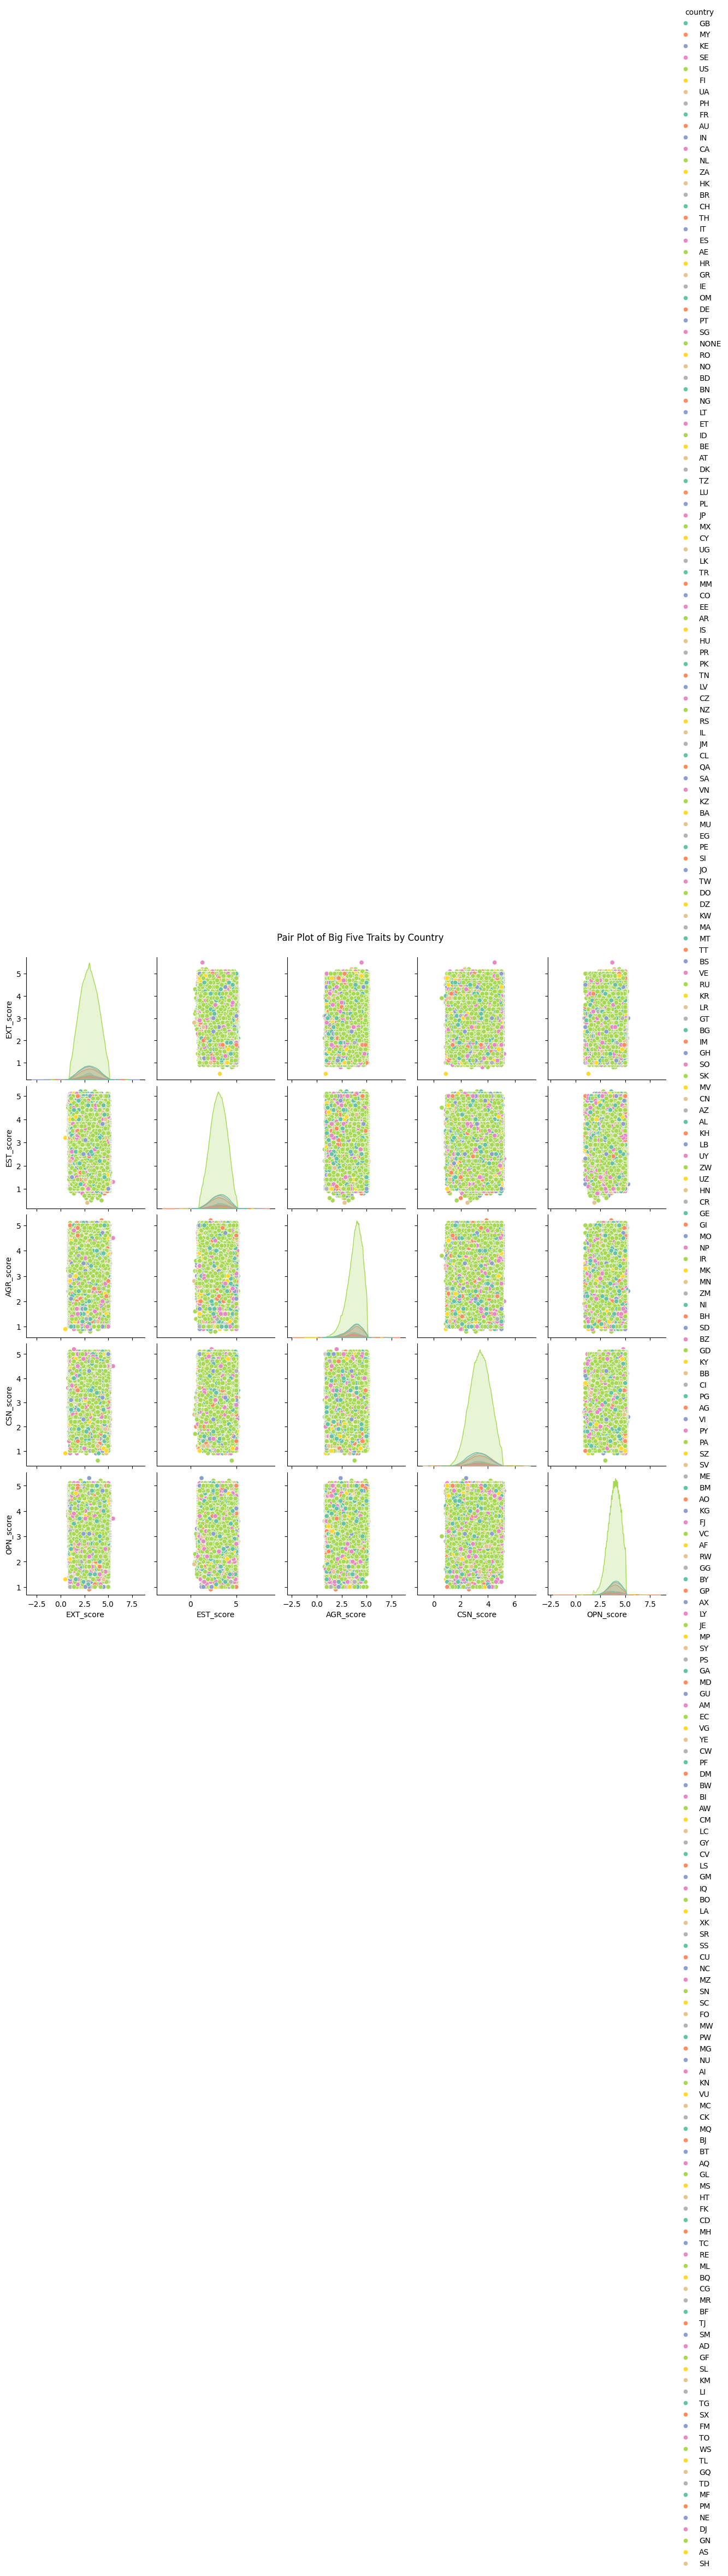

In [ ]:
sns.pairplot(df_new, vars=['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score'], hue='country', palette='Set2')
plt.suptitle('Pair Plot of Big Five Traits by Country', y=1.02)
plt.show()

####  Customized Pair Plot

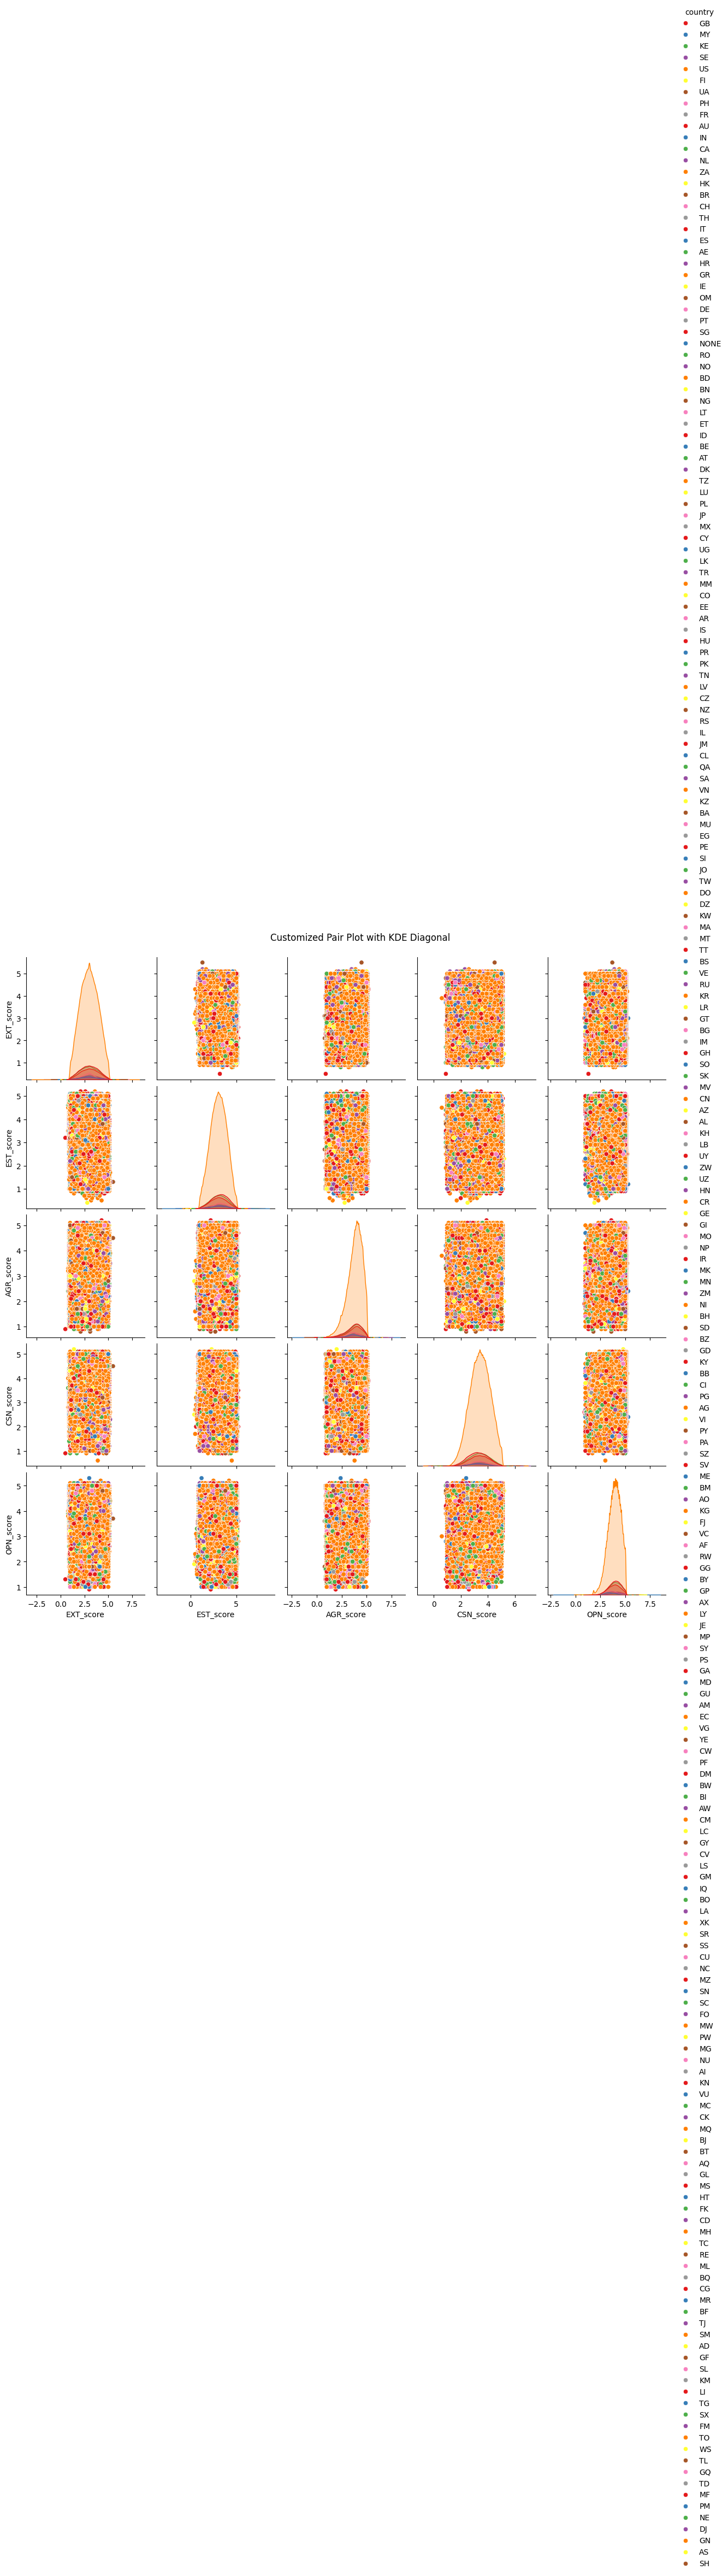

In [32]:
sns.pairplot(df_new, vars=['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score'],
             kind='scatter', diag_kind='kde', hue='country', palette='Set1')
plt.suptitle('Customized Pair Plot with KDE Diagonal', y=1.02)
plt.show()


### Checking Skewness of BIG Five traits

####  Histograms for Each Trait

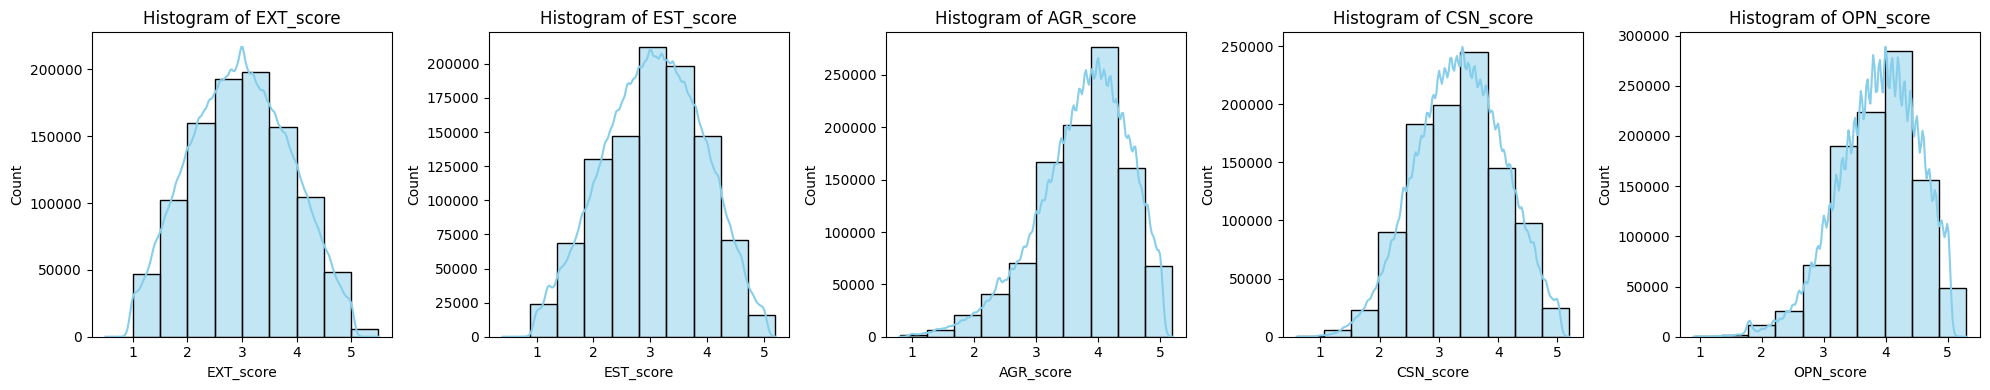

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
traits = ['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score']
for i, trait in enumerate(traits):
    sns.histplot(df_new[trait], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {trait}')
plt.tight_layout()
plt.show()


By Histogram of each trait we can infer that mostly the graph are near Normally distributed for EXT_score , EST_score , CSN_score . Where as AGR_score and OPN_score are little bit neatively skewed

Checking Skewness of Big Five Trait Scores
Measuring how much each trait score is skewed using the scipy.stats.skew function.

In [23]:
traits = ['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score']

# Calculate skewness for each trait
skewness_values = {trait: skew(df_new[trait].dropna()) for trait in traits}

# Display the results
for trait, value in skewness_values.items():
    print(f"{trait}: skewness = {value:.3f}")

EXT_score: skewness = 0.029
EST_score: skewness = -0.089
AGR_score: skewness = -0.660
CSN_score: skewness = -0.090
OPN_score: skewness = -0.489


There is not much of skewness in our data so we can work with it easily :

#### Boxplot: Extraversion by Country

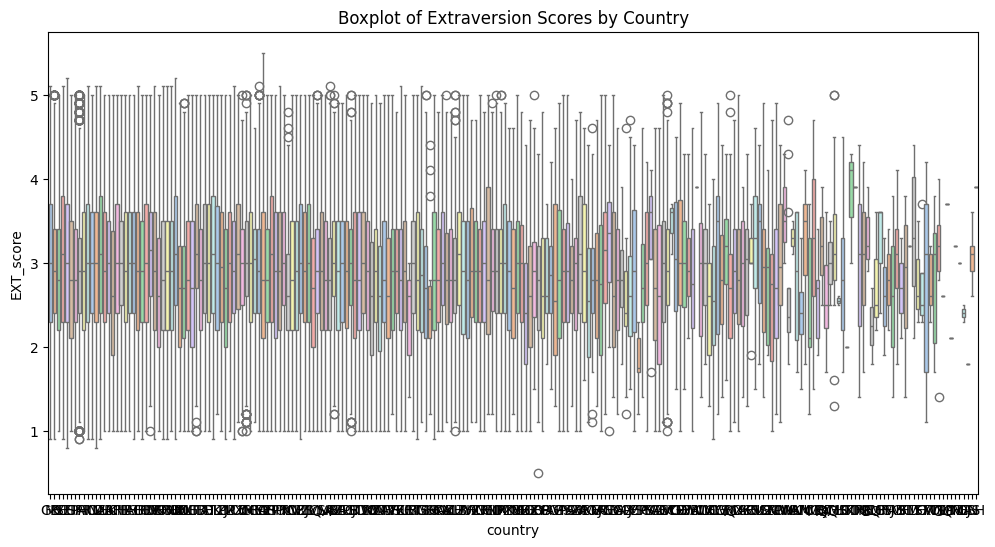

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_new, x='country', y='EXT_score', palette='pastel')
plt.title('Boxplot of Extraversion Scores by Country')
plt.show()

#### Bar Plot: Average Trait Scores by Country

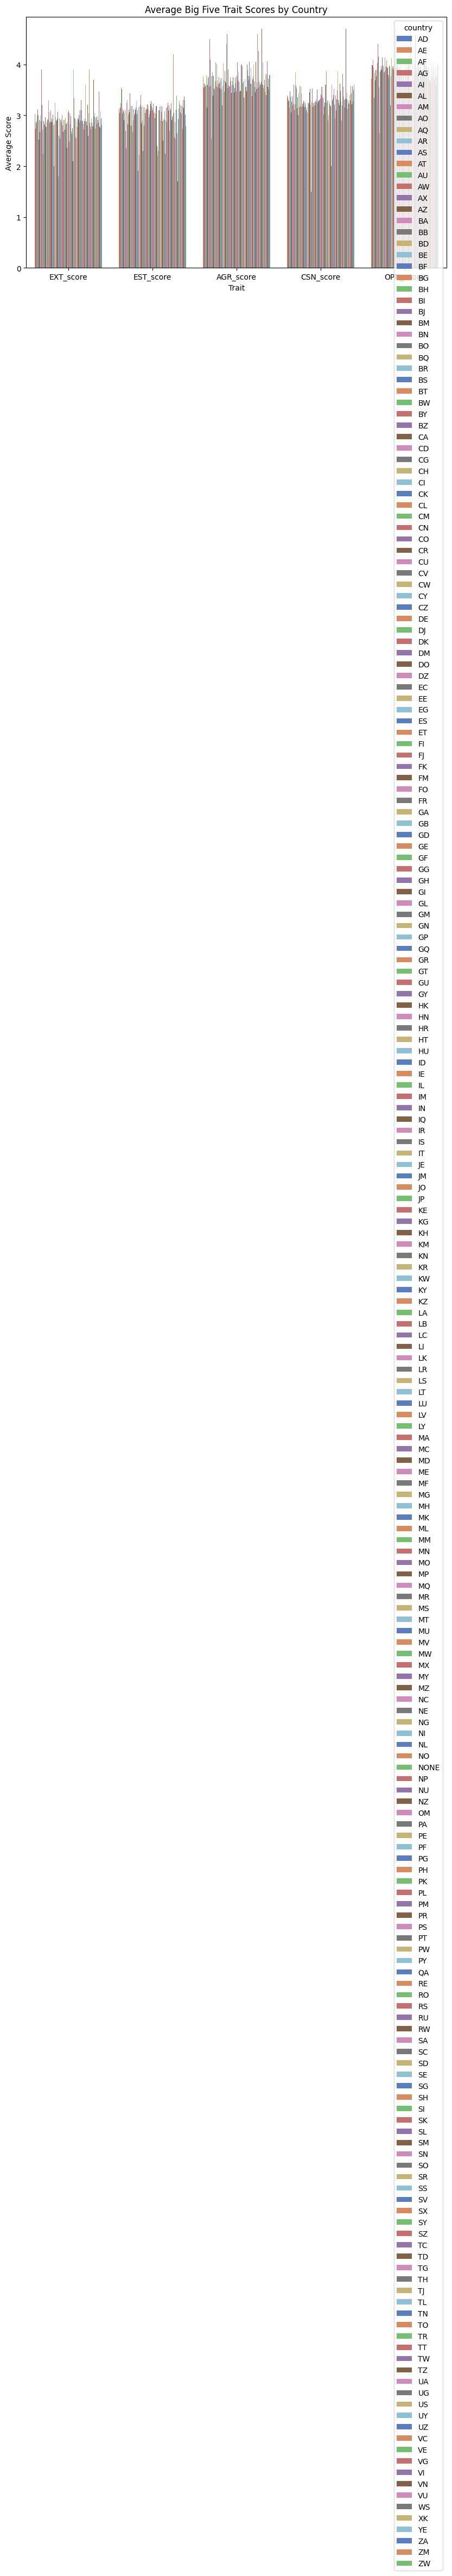

In [35]:
avg_scores = df_new.groupby('country')[traits].mean().reset_index()
avg_scores_melted = avg_scores.melt(id_vars='country', var_name='Trait', value_name='Average Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_melted, x='Trait', y='Average Score', hue='country', palette='muted')
plt.title('Average Big Five Trait Scores by Country')
plt.show()


##### Heatmap: Correlation Matrix

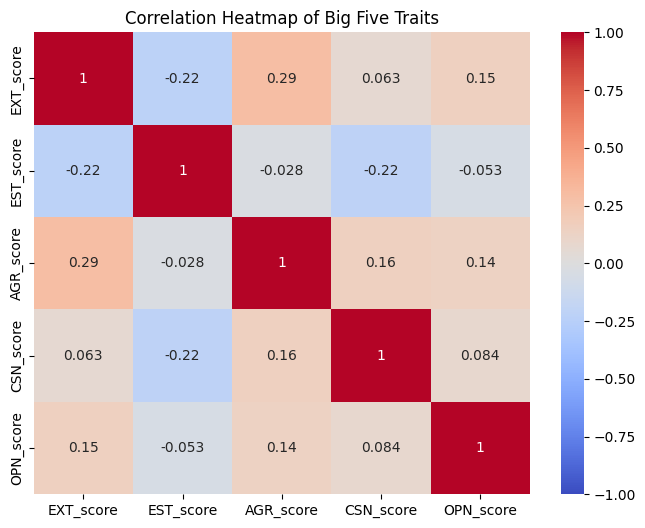

In [36]:
plt.figure(figsize=(8, 6))
corr = df_new[traits].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Big Five Traits')
plt.show()


In [19]:
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country  testelapse  total_minutes  
0            GB       234.0            121  
1            MY       179.0            121  
2            GB       186.0            121  
3            GB       219.0            122  
4            KE       315.0            122  
...         ...         ...            ...  
1015336      US       160.0            724  
1015337      US       122.0            727  
1015338      US       135.0            727  
1015339      US       212.0            728  
1015340      US       176.0            728  

[1015341 rows x 9 columns]

In [20]:
df_new.describe()

EXT_score     EST_score     AGR_score     CSN_score     OPN_score  \
count  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06  1.015341e+06   
mean   2.966461e+00  3.058337e+00  3.759220e+00  3.354367e+00  3.871616e+00   
std    9.043762e-01  8.611834e-01  7.321350e-01  7.369890e-01  6.458535e-01   
min    5.000000e-01  4.000000e-01  8.000000e-01  6.000000e-01  9.000000e-01   
25%    2.300000e+00  2.400000e+00  3.300000e+00  2.800000e+00  3.400000e+00   
50%    3.000000e+00  3.100000e+00  3.800000e+00  3.400000e+00  3.900000e+00   
75%    3.600000e+00  3.700000e+00  4.300000e+00  3.900000e+00  4.400000e+00   
max    5.500000e+00  5.200000e+00  5.200000e+00  5.200000e+00  5.300000e+00   

       country_code    testelapse  total_minutes  
count  1.015341e+06  1.015341e+06   1.015341e+06  
mean   1.528596e+02  6.796953e+02   7.454057e+02  
std    7.168440e+01  2.017348e+04   3.695346e+02  
min    0.000000e+00  1.000000e+00   0.000000e+00  
25%    6.900000e+01  1.710000e+02   4.650000e+02  
50%    2.080000e+02  2.240000e+02   7.340000e+02  
75%    2.080000e+02  3.140000e+02   1.053000e+03  
max    2.220000e+02  1.189272e+07   1.439000e+03

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   EXT_score      1015341 non-null  float64
 1   EST_score      1015341 non-null  float64
 2   AGR_score      1015341 non-null  float64
 3   CSN_score      1015341 non-null  float64
 4   OPN_score      1015341 non-null  float64
 5   country_code   1015341 non-null  int16  
 6   country        1015341 non-null  object 
 7   testelapse     1015341 non-null  float64
 8   total_minutes  1015341 non-null  int64  
dtypes: float64(6), int16(1), int64(1), object(1)
memory usage: 63.9+ MB


 Finding max and min values

In [24]:
maxV_col = df_new[['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score', 'testelapse', 'total_minutes']].max()
minV_col = df_new[['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score', 'testelapse', 'total_minutes']].min()
print("Max values:")
print(maxV_col)
print("\nMin values:")
print(minV_col)

Max values:
EXT_score               5.5
EST_score               5.2
AGR_score               5.2
CSN_score               5.2
OPN_score               5.3
testelapse       11892718.0
total_minutes        1439.0
dtype: float64

Min values:
EXT_score        0.5
EST_score        0.4
AGR_score        0.8
CSN_score        0.6
OPN_score        0.9
testelapse       1.0
total_minutes    0.0
dtype: float64


In [25]:
df_new['testelapse'].mean()

np.float64(679.6952797139089)

## Searching for outliers

from above mean , max and min values of column we can infer  that there can be outlier values in testelapse as *mean(6.796953)* , *min(1.0)* values are close to eachother but the **max value** **11892718** .

In [27]:
#calculate interquartile range
q25, q50 , q75 = np.percentile(df_new['testelapse'], [25,50,75])
iqr = q75 - q25

#calculate min and max to be considered as an outlier
min = q25 - 1.5*(iqr)
max = q75 + 1.5*(iqr)

print(min, q25 , q50 , q75 , max)


# identify the points as
count = 0
for x in data ["testelapse"]:
    if x > max:
        count += 1

print(count)

# [x for x in data ["testelapse"] if x > max]

-43.5 171.0 224.0 314.0 528.5
88666


by this we can say that interqueartile range is not perfect for detecting outliers in our data . As our data can be highly skewed

So lets visulize our *df_new['testelapse']* . To see if we can infer anything

1. Boxplot

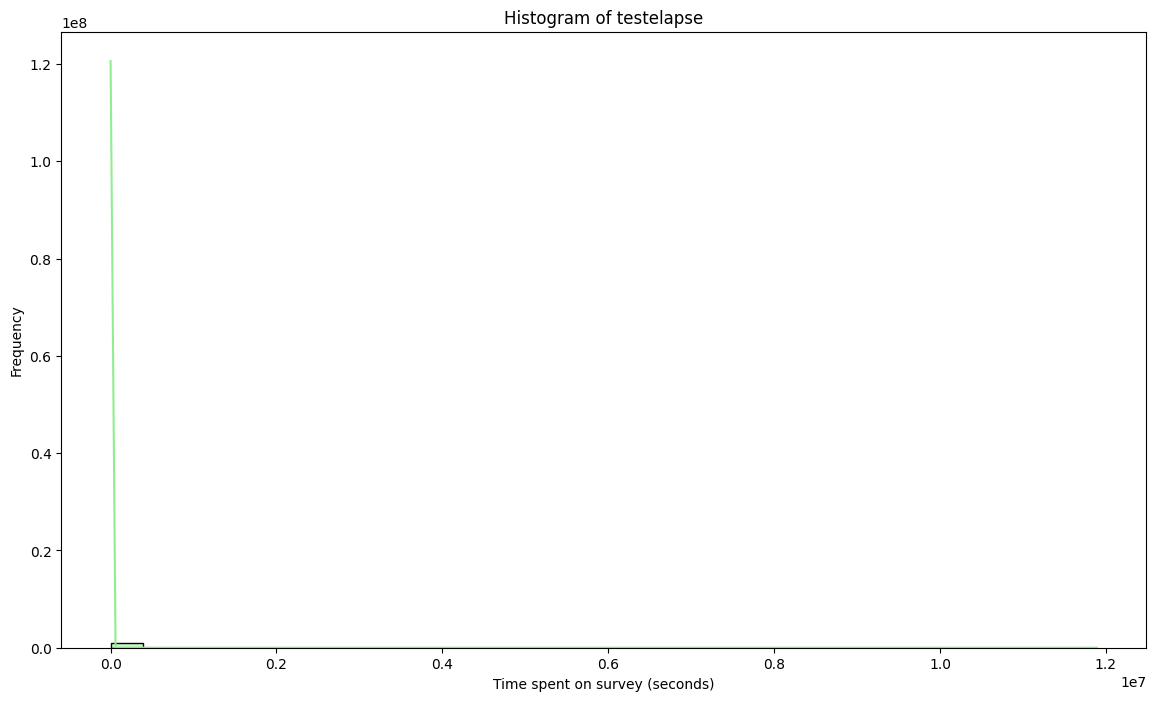

In [38]:
plt.figure(figsize=(14, 8))
sns.histplot(df_new['testelapse'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of testelapse')
plt.xlabel('Time spent on survey (seconds)')
plt.ylabel('Frequency')
plt.show()

from the above histogram we can say that data has an scaling issue or the data is highly skewed . Either of the way we can apply log transformation for better understanding of the data

### Checking for outliers

1. By comparing the  99th percentile, And Capping the data wiht 1 hour or 3600 seconds vs the original data

Capping Outliers

In [28]:
# Calculate the 99th percentile and set a max threshold (1 hour = 3600 seconds)
percentile_99 = df_new['testelapse'].quantile(0.99)
max_threshold = 3600


cap_value = __builtin__.min(percentile_99, max_threshold)


df_new['testelapse_capped99'] = np.where(df_new['testelapse'] > cap_value, cap_value, df_new['testelapse'])

In [75]:
print(percentile_99)
print(cap_value)

3194.5999999999767
3194.5999999999767


In [29]:
# how many rows we are excluding as outliers
percentile_100 = df_new['testelapse'].quantile(1)

# outliers removed after capping
print("percentile_100(max_data)" , percentile_100)
print("\npercentile_99" , percentile_99)

top_1percent_values = percentile_99
count = 0
for x in df_new["testelapse"]:
    if x > top_1percent_values:
        # print(x)
        count += 1

print("count of outliers: ",count)
print("\ntotal % of outliers from total rows", (count/len(df_new))*100)

percentile_100(max_data) 11892718.0

percentile_99 3194.5999999999767
count of outliers:  10154

total % of outliers from total rows 1.0000581085566327


From this we can say that removing the 1% outliers can be a good choice as **99%** of **testelaspse**  *is less than 1 hour(or 3600sec)*

Visualizing With and Without Outliers

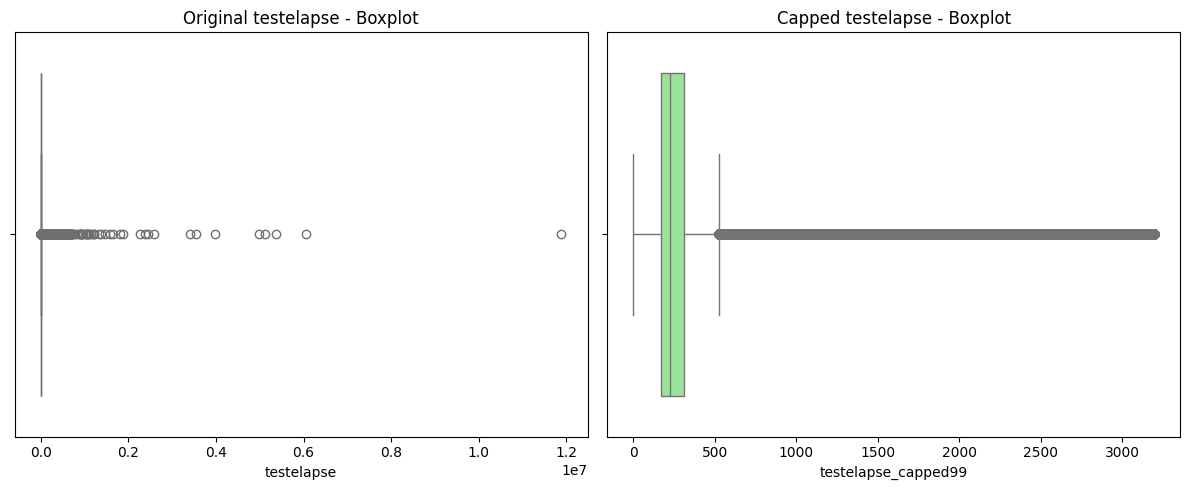

In [28]:
plt.figure(figsize=(12, 5))


# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=df_new['testelapse'], color='skyblue')
plt.title('Original testelapse - Boxplot')


# Capped
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['testelapse_capped99'], color='lightgreen')
plt.title('Capped testelapse - Boxplot')

plt.tight_layout()
plt.show()

Histograms

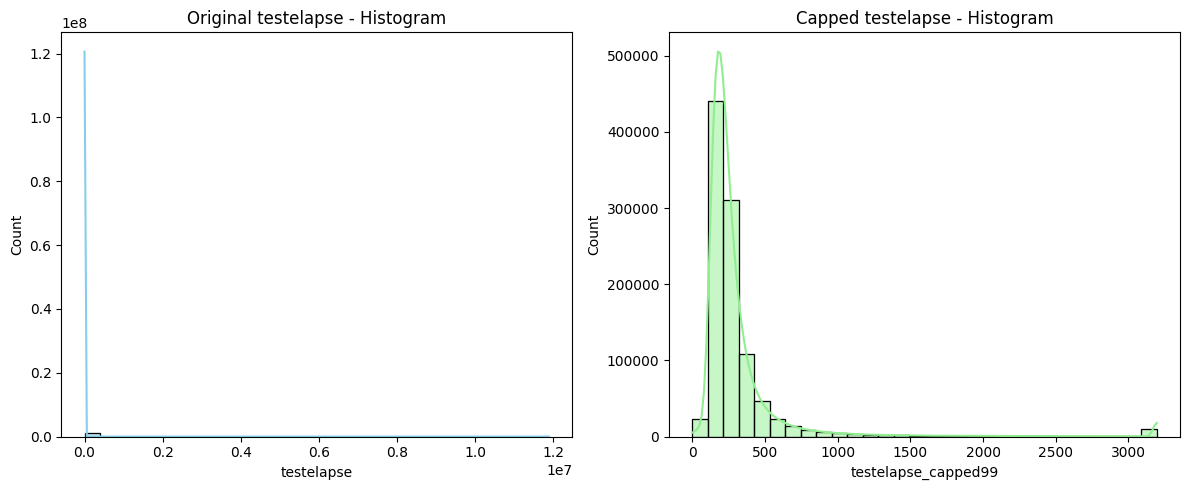

In [29]:
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df_new['testelapse'], bins=30, kde=True, color='skyblue')
plt.title('Original testelapse - Histogram')

# Capped
plt.subplot(1, 2, 2)
sns.histplot(df_new['testelapse_capped99'], bins=30, kde=True, color='lightgreen')
plt.title('Capped testelapse - Histogram')

plt.tight_layout()
plt.show()

After removing the data, we can still see there are some outlier on the right side of the graph, So lets do the same thing by capping the data to 98percentile

In [30]:
# Calculate the 99th percentile and set a max threshold (1 hour = 3600 seconds)
percentile_98 = df_new['testelapse'].quantile(0.98)
print(percentile_98)
df_new['testelapse_capped98'] = np.where(df_new['testelapse'] > percentile_98,  percentile_98, df_new['testelapse'])

1506.0


In [31]:
# how many rows we are excluding as outliers
percentile_100 = df_new['testelapse'].quantile(1)

# outliers removed after capping
print("percentile_100(max_data)" , percentile_100)
print("\npercentile_99" , percentile_98)

top_2percent_values = percentile_98
count = 0
for x in df_new["testelapse"]:
    if x > top_2percent_values:
        # print(x)
        count += 1

print("count of outliers: ",count)
print("\ntotal % of outliers from total rows", (count/len(df_new))*100)

percentile_100(max_data) 11892718.0

percentile_99 1506.0
count of outliers:  20296

total % of outliers from total rows 1.9989343481648036


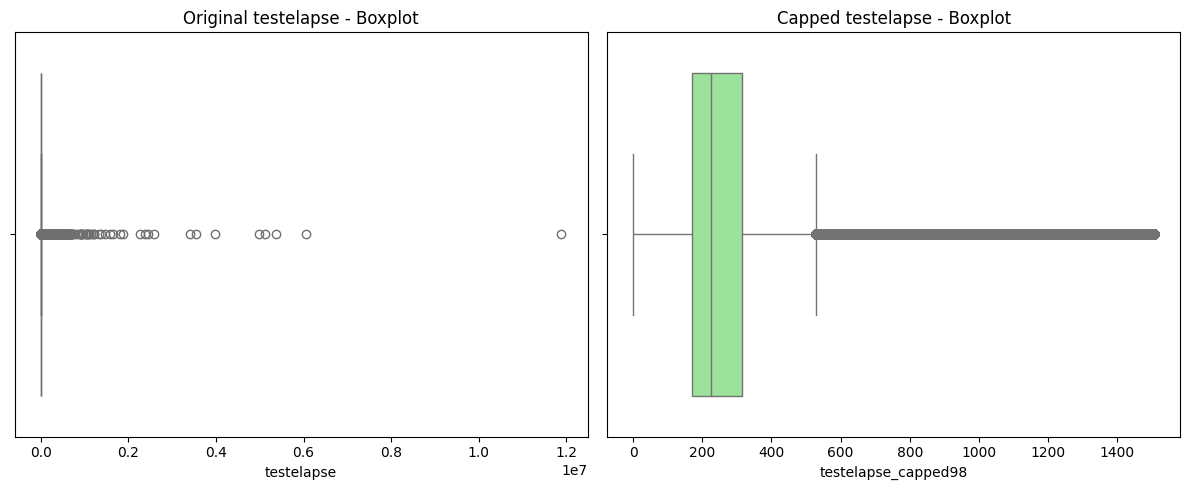

In [32]:
# Visulaizing Boxplot with and wihtout outliers
plt.figure(figsize=(12, 5))


# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=df_new['testelapse'], color='skyblue')
plt.title('Original testelapse - Boxplot')


# Capped
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['testelapse_capped98'], color='lightgreen')
plt.title('Capped testelapse - Boxplot')

plt.tight_layout()
plt.show()

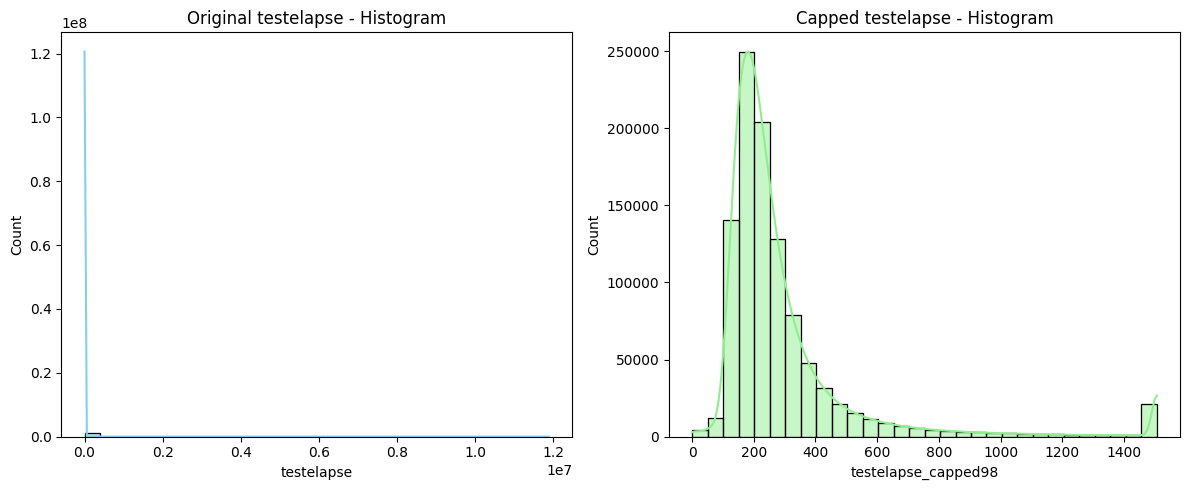

In [84]:
# visualizing histogram with and wihtout outliers
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df_new['testelapse'], bins=30, kde=True, color='skyblue')
plt.title('Original testelapse - Histogram')

# Capped
plt.subplot(1, 2, 2)
sns.histplot(df_new['testelapse_capped98'], bins=30, kde=True, color='lightgreen')
plt.title('Capped testelapse - Histogram')

plt.tight_layout()
plt.show()

Checking skewness of above data

In [32]:
Testing_cap98 = ['testelapse_capped98']
skewness_values = {x_cap98: skew(df_new[x_cap98].dropna()) for x_cap98 in Testing_cap98}

# Display the results
for x_cap98, value in skewness_values.items():
    print(f"{x_cap98}: skewness = {value:.3f}")


testelapse_capped98: skewness = 3.291


Aboved data is somewhat skewed lets transform the data in next step

### Transformation of Testelapse_capped98 data

####  Log Transformation
Apply a log transformation to both the original and capped variables to help normalize the distribution.
By adding a small constant 1 to all values, including zero, you ensure that all values in the transformed data are valid for the logarithm function.

In [33]:
# Log transform without adding 0 as there is no 0 value in testelapse
df_new['testelapse_log'] = np.log(df_new['testelapse'])
df_new['testelapse_capped98_log'] = np.log(df_new['testelapse_capped98'])


In [34]:
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country  testelapse  total_minutes  testelapse_capped99  \
0            GB       234.0            121                234.0   
1            MY       179.0            121                179.0   
2            GB       186.0            121                186.0   
3            GB       219.0            122                219.0   
4            KE       315.0            122                315.0   
...         ...         ...            ...                  ...   
1015336      US       160.0            724                160.0   
1015337      US       122.0            727                122.0   
1015338      US       135.0            727                135.0   
1015339      US       212.0            728                212.0   
1015340      US       176.0            728                176.0   

         testelapse_capped98  testelapse_log  testelapse_capped98_log  
0                      234.0        5.455321                 5.455321  
1                      179.0        5.187386                 5.187386  
2                      186.0        5.225747                 5.225747  
3                      219.0        5.389072                 5.389072  
4                      315.0        5.752573                 5.752573  
...                      ...             ...                      ...  
1015336                160.0        5.075174                 5.075174  
1015337                122.0        4.804021                 4.804021  
1015338                135.0        4.905275                 4.905275  
1015339                212.0        5.356586                 5.356586  
1015340                176.0        5.170484                 5.170484  

[1015341 rows x 13 columns]

We can see by log transformation the data is also scaled to desired length , which is easily comparable wiht the big five traits value

###### Visualizing Log-Transformed Distributions

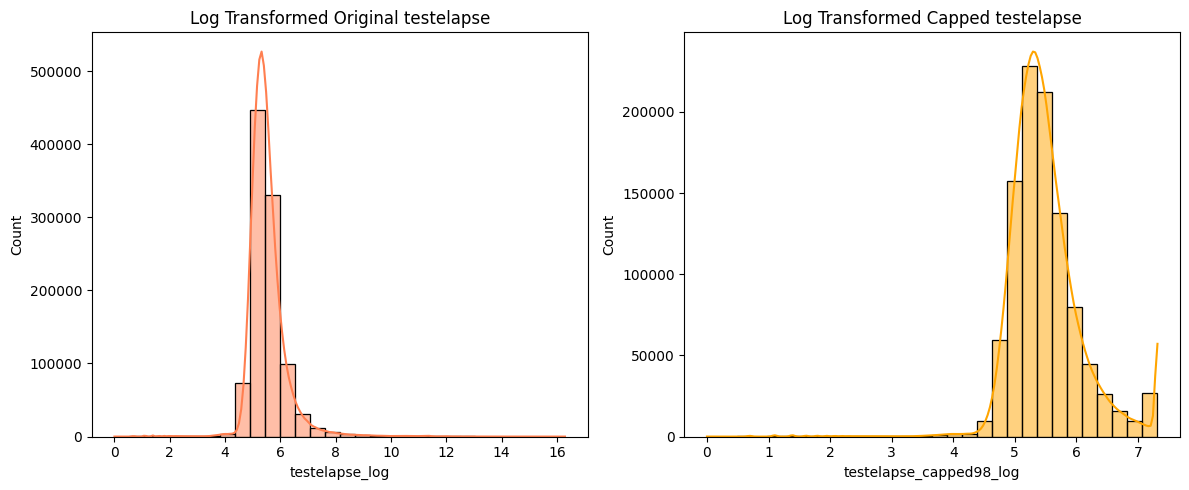

In [96]:
plt.figure(figsize=(12, 5))

# Log-transformed original
plt.subplot(1, 2, 1)
sns.histplot(df_new['testelapse_log'], bins=30, kde=True, color='coral')
plt.title('Log Transformed Original testelapse')

# Log-transformed capped
plt.subplot(1, 2, 2)
sns.histplot(df_new['testelapse_capped98_log'], bins=30, kde=True, color='orange')
plt.title('Log Transformed Capped testelapse')

plt.tight_layout()
plt.show()

In [35]:
# checking skewness of Transformed log data
Testing_cap98_log = ['testelapse_capped98_log']
skewness_values = {x_cap98_log: skew(df_new[x_cap98].dropna()) for x_cap98_log in Testing_cap98_log}

# Display the results
for x_cap98_log, value in skewness_values.items():
    print(f"{x_cap98_log}: skewness = {value:.3f}")

testelapse_capped98_log: skewness = 3.291


Trying Box-Cox Transformation

In [36]:
df['testelapse'].describe()

count    1.013558e+06
mean     6.754233e+02
std      2.017864e+04
min      1.000000e+00
25%      1.710000e+02
50%      2.240000e+02
75%      3.130000e+02
max      1.189272e+07
Name: testelapse, dtype: float64

In [66]:
# data is strictly positive
transformed, fitted_lambda = boxcox(df_new['testelapse_capped98'] )

# Check skewness after Box-Cox
print('Skewness after Box-Cox:', skew(transformed))
print('Lambda used:', fitted_lambda)


Skewness after Box-Cox: -0.07477958106275462
Lambda used: -0.0562376888333087


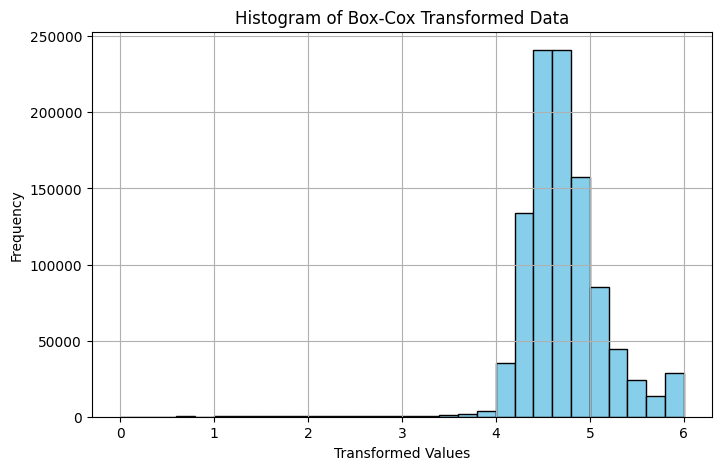

In [106]:
plt.figure(figsize=(8, 5))
plt.hist(transformed, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Data')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
transformed


array([4.6978872 , 4.49924715, 4.52787079, ..., 4.28683739, 4.62503587,
       4.48661596])

In [39]:
df_new['testelapse_boxcox'] = transformed

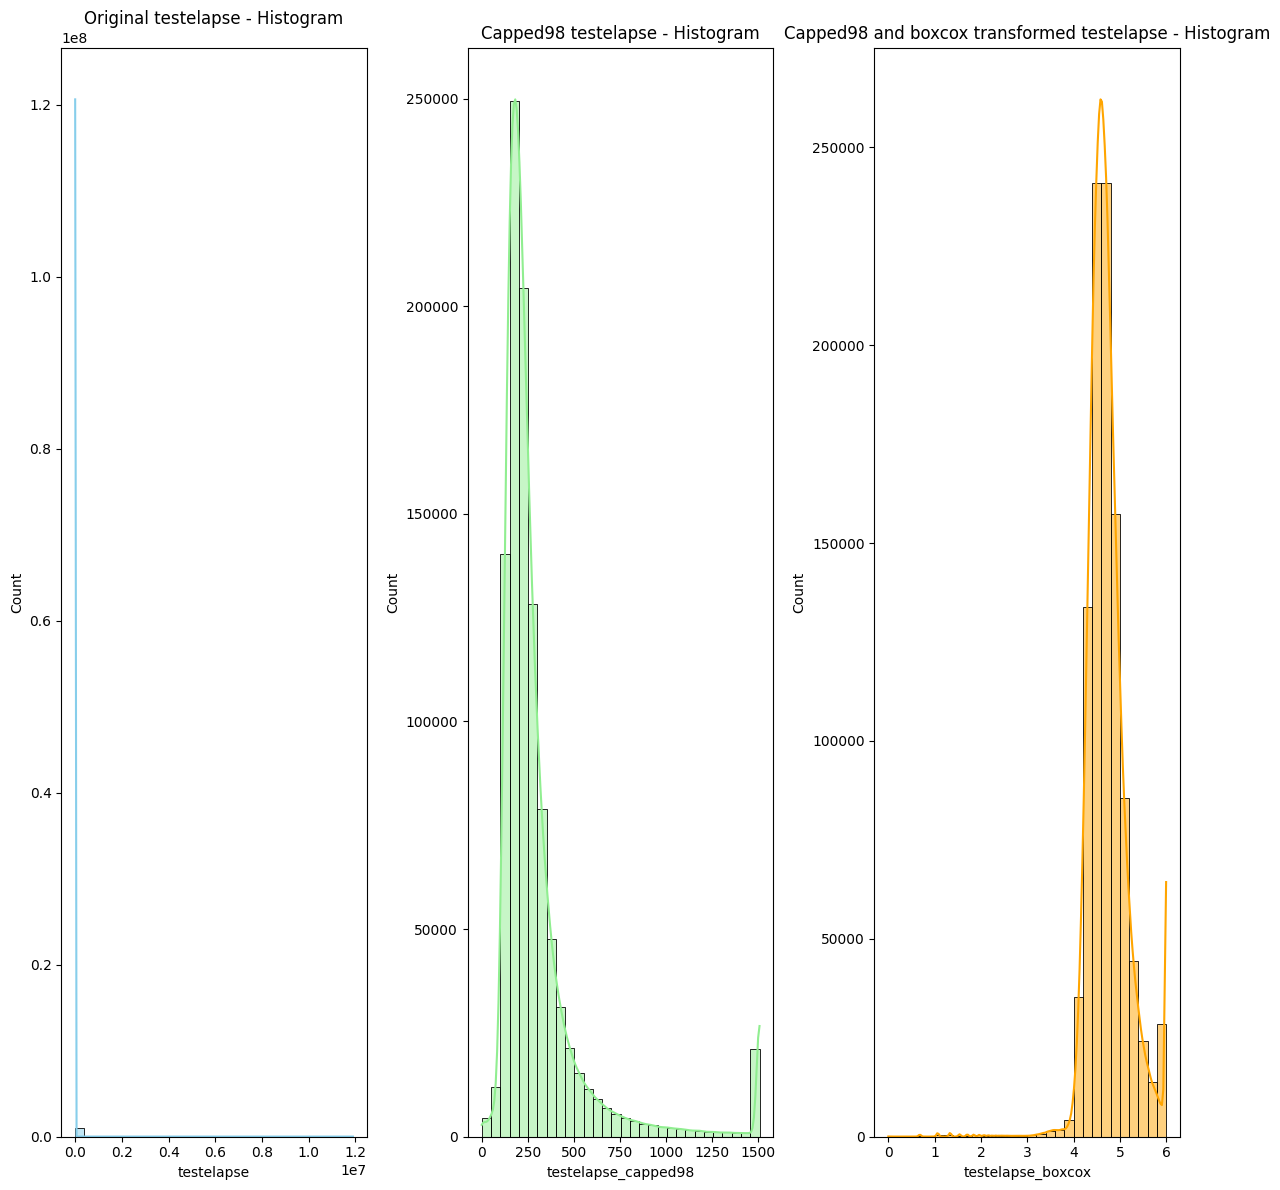

In [120]:
# visualizing histogram with and wihtout outliers
plt.figure(figsize=(12, 12))

# Original
plt.subplot(1, 3, 1)
sns.histplot(df_new['testelapse'], bins=30, kde=True, color='skyblue')
plt.title('Original testelapse - Histogram')

# Capped
plt.subplot(1, 3, 2)
sns.histplot(df_new['testelapse_capped98'], bins=30, kde=True, color='lightgreen')
plt.title('Capped98 testelapse - Histogram')

# Capped and boxcox transformed
plt.subplot(1, 3, 3)
sns.histplot(df_new['testelapse_boxcox'], bins=30, kde=True, color='orange')
plt.title('boxcox transformed testelapse - Histogram')

plt.tight_layout()
plt.show()

## Visualizing Big Five Traits and Testelapse (Box-Cox Transformed)

1. Histograms for Big Five Traits and Testelapse_Boxcox

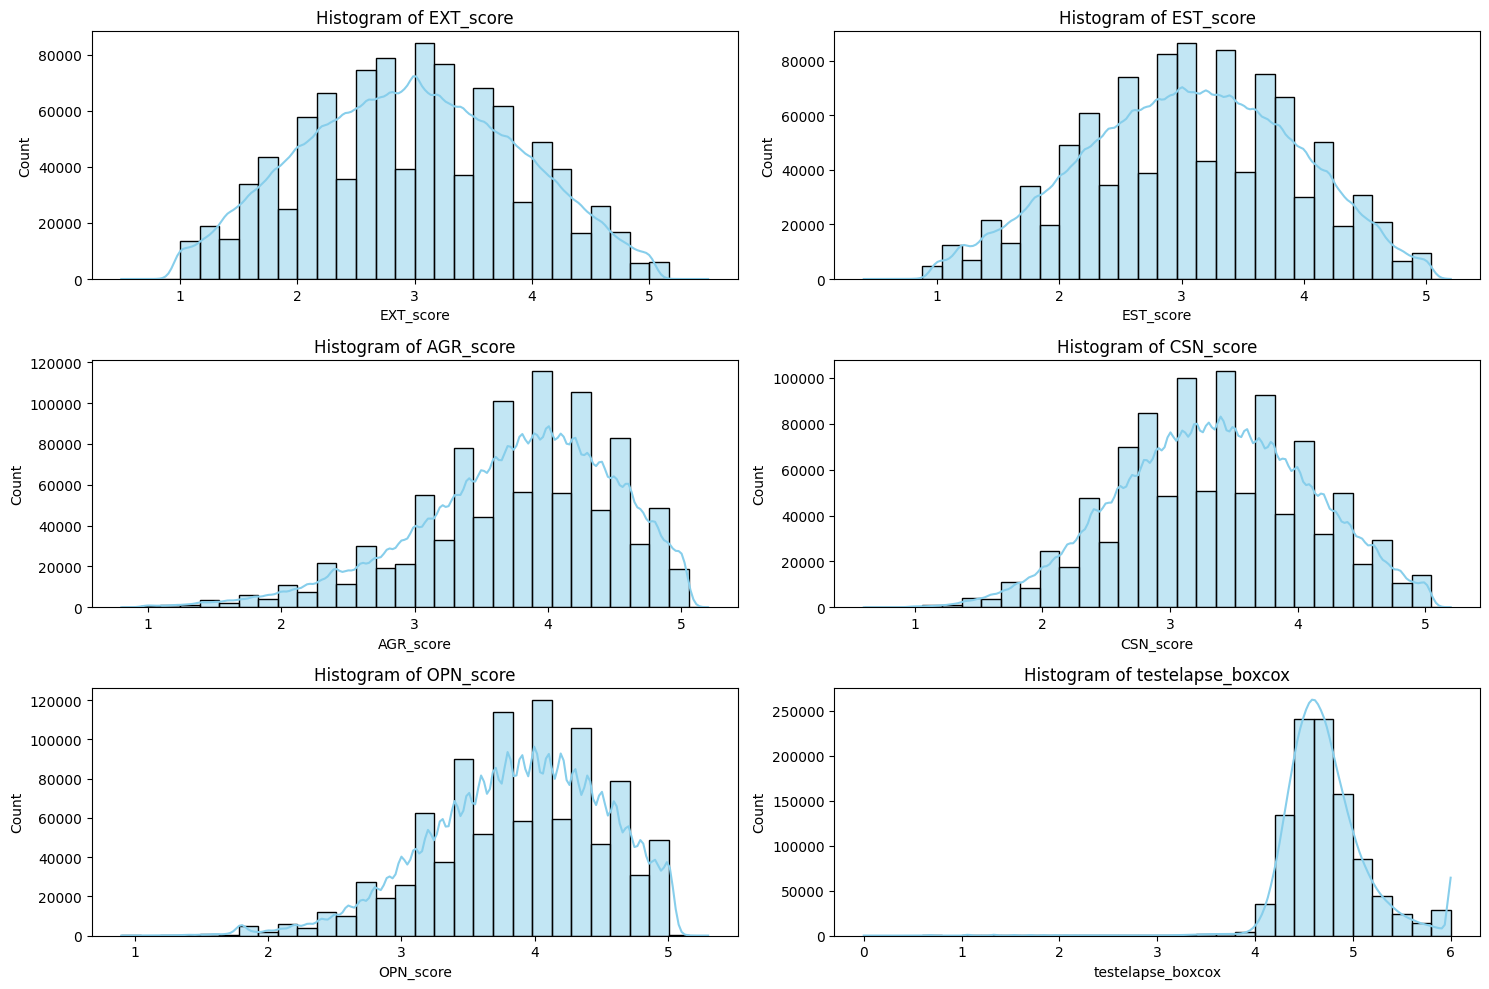

In [121]:
traits = ['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score', 'testelapse_boxcox']

plt.figure(figsize=(15, 10))
for i, trait in enumerate(traits):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_new[trait], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {trait}')
plt.tight_layout()
plt.show()

2. Pair Plot (Big Five Traits + Testelapse_Boxcox, Colored by Country)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

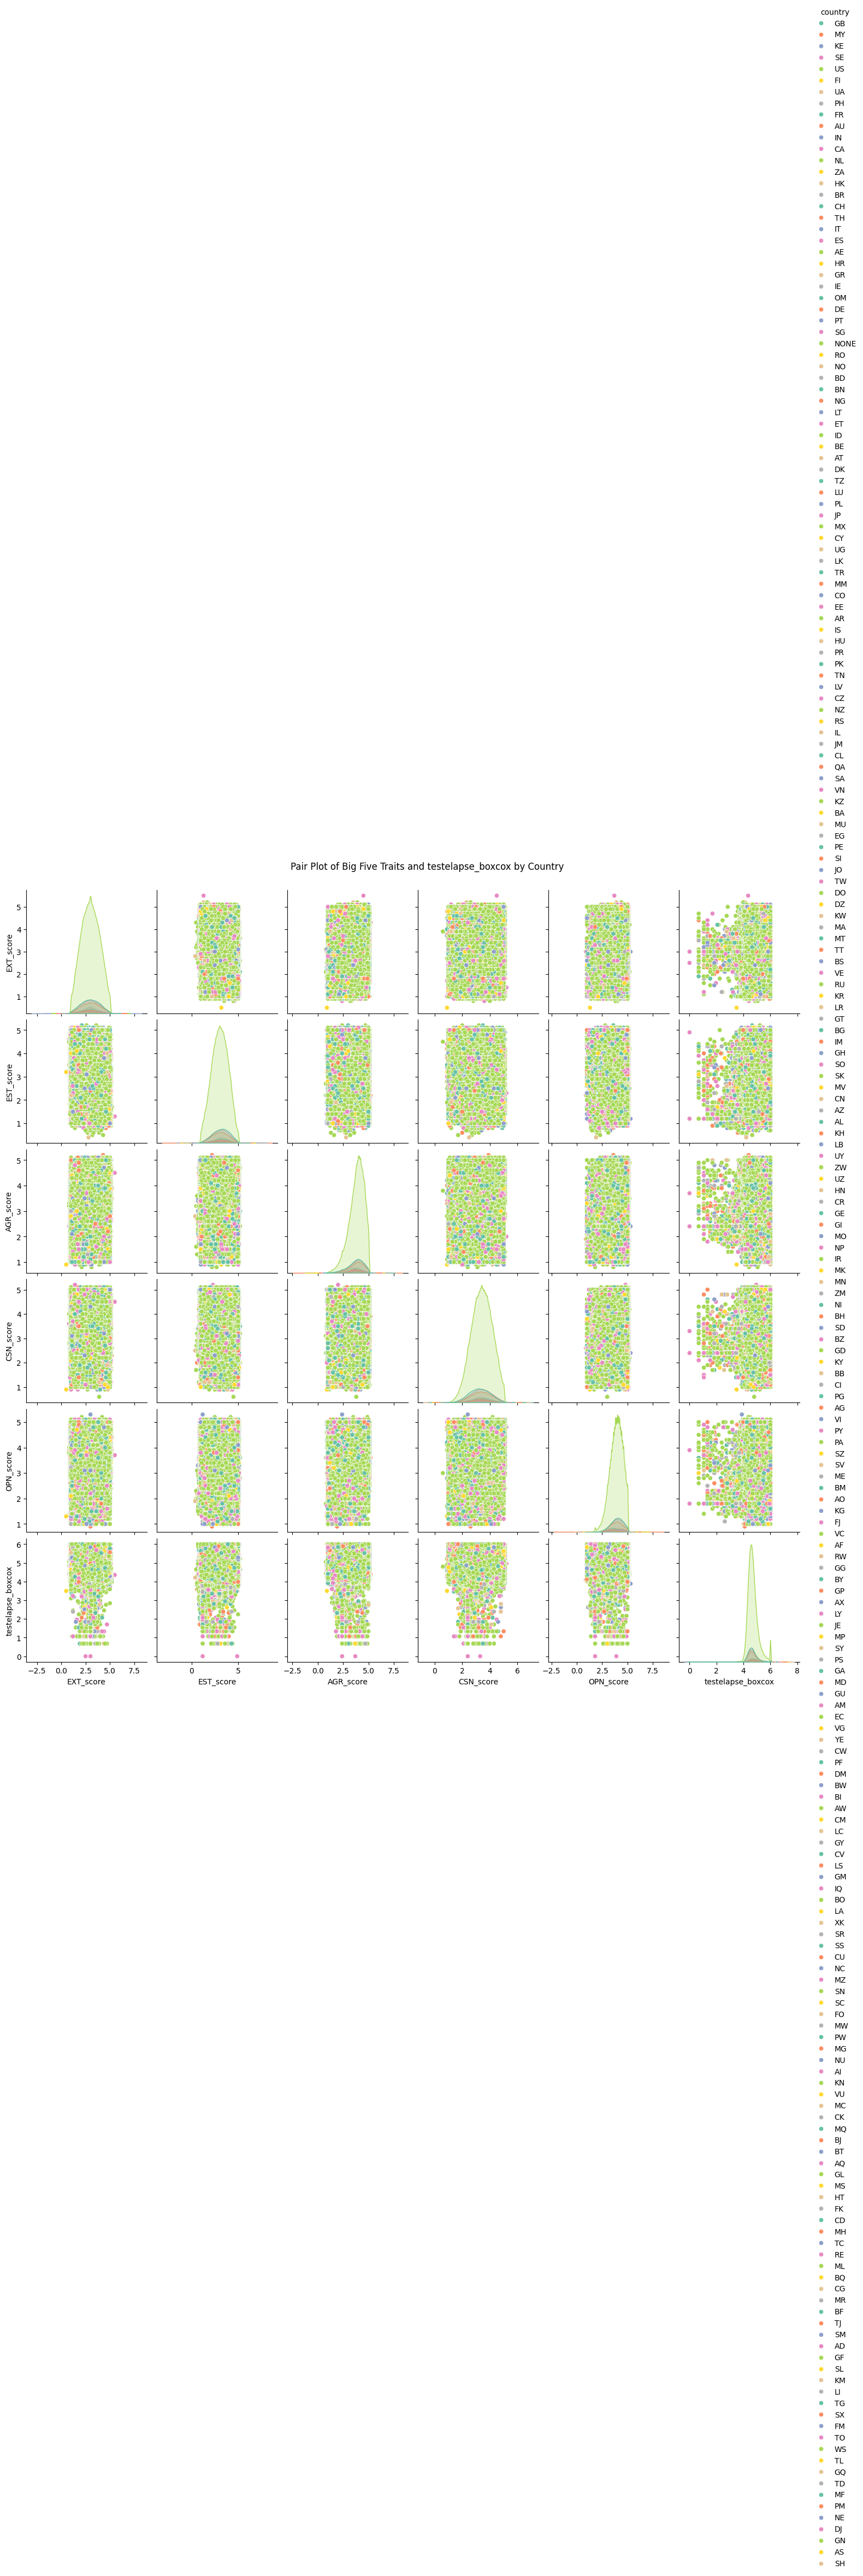

In [41]:
sns.pairplot(
    df_new,
    vars=['EXT_score', 'EST_score', 'AGR_score', 'CSN_score', 'OPN_score', 'testelapse_boxcox'],
    hue='country',
    palette='Set2'
)
plt.suptitle('Pair Plot of Big Five Traits and testelapse_boxcox by Country', y=1.02)
plt.show()


3. Hexbin Plot (EXT_score vs. Testelapse_Boxcox)

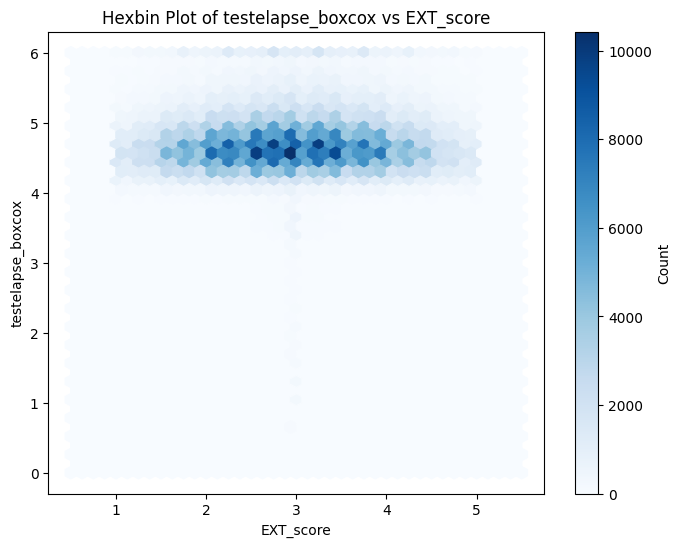

In [42]:
plt.figure(figsize=(8, 6))
plt.hexbin(df_new['EXT_score'], df_new['testelapse_boxcox'], gridsize=40, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('EXT_score')
plt.ylabel('testelapse_boxcox')
plt.title('Hexbin Plot of testelapse_boxcox vs EXT_score')
plt.show()

4. Bar Plot (Average Testelapse_Boxcox by Country

In [ ]:
avg_testelapse_by_country = df_new.groupby('country')['testelapse_boxcox'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_testelapse_by_country, x='country', y='testelapse_boxcox', palette='muted')
plt.title('Average Box-Cox Transformed Test Elapse Time by Country')
plt.ylabel('Average testelapse_boxcox')
plt.xlabel('Country')
plt.show()


In [40]:
df_new

EXT_score  EST_score  AGR_score  CSN_score  OPN_score  country_code  \
0              4.6        2.4        3.9        3.2        4.5            69   
1              2.0        2.5        4.4        3.7        3.5           144   
2              2.5        2.6        4.2        3.4        4.1            69   
3              2.6        2.9        3.8        2.5        3.9            69   
4              2.9        1.9        4.6        4.8        4.8           103   
...            ...        ...        ...        ...        ...           ...   
1015336        3.4        3.3        3.8        3.1        3.3           208   
1015337        3.2        4.4        3.9        2.8        4.5           208   
1015338        3.9        2.9        3.5        1.9        4.8           208   
1015339        2.2        3.5        3.7        3.8        4.1           208   
1015340        3.9        2.9        4.2        2.8        4.7           208   

        country  testelapse  total_minutes  testelapse_capped99  \
0            GB       234.0            121                234.0   
1            MY       179.0            121                179.0   
2            GB       186.0            121                186.0   
3            GB       219.0            122                219.0   
4            KE       315.0            122                315.0   
...         ...         ...            ...                  ...   
1015336      US       160.0            724                160.0   
1015337      US       122.0            727                122.0   
1015338      US       135.0            727                135.0   
1015339      US       212.0            728                212.0   
1015340      US       176.0            728                176.0   

         testelapse_capped98  testelapse_log  testelapse_capped98_log  \
0                      234.0        5.455321                 5.455321   
1                      179.0        5.187386                 5.187386   
2                      186.0        5.225747                 5.225747   
3                      219.0        5.389072                 5.389072   
4                      315.0        5.752573                 5.752573   
...                      ...             ...                      ...   
1015336                160.0        5.075174                 5.075174   
1015337                122.0        4.804021                 4.804021   
1015338                135.0        4.905275                 4.905275   
1015339                212.0        5.356586                 5.356586   
1015340                176.0        5.170484                 5.170484   

         testelapse_boxcox  
0                 4.697887  
1                 4.499247  
2                 4.527871  
3                 4.649050  
4                 4.914787  
...                    ...  
1015336           4.415163  
1015337           4.209775  
1015338           4.286837  
1015339           4.625036  
1015340           4.486616  

[1015341 rows x 14 columns]

## Hypotheses Testing

#### 1. Personality Traits and Test Completion Time
There is a significant association between Conscientiousness (CSN_score) and the time taken to complete the test (testelapse_log or testelapse_capped98_log).
Rationale: More conscientious individuals may complete the survey more efficiently, resulting in shorter completion times

**H0:** There is no any significant association between Conscientiousness (CSN_score) and the time taken to complete the test (testelapse or testelapse_boxcox)

**H1:** There is a significant association between Conscientiousness (CSN_score) and the time taken to complete the test (testelapse or testelapse_boxcox).

*Rationale:* More conscientious individuals may complete the survey more efficiently, resulting in shorter completion times

 Bar Plot: Average Test Completion Time by Conscientiousness Group

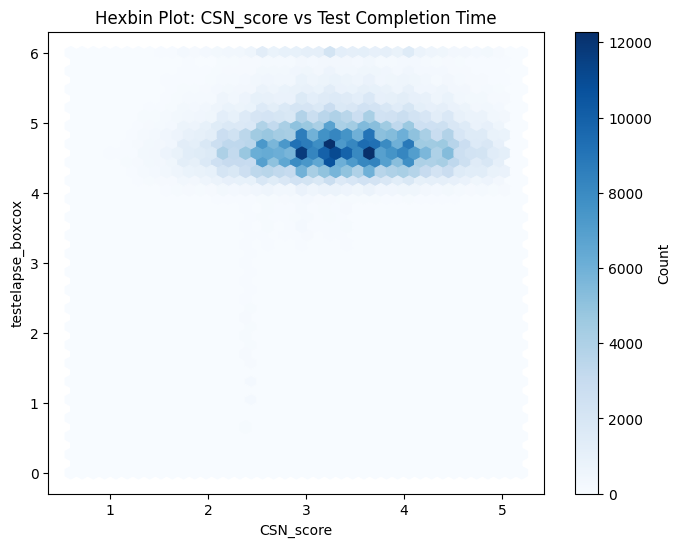

In [48]:
plt.figure(figsize=(8, 6))
plt.hexbin(
    df_new['CSN_score'],
    df_new['testelapse_boxcox'],
    gridsize=40,
    cmap='Blues'
)
plt.colorbar(label='Count')
plt.xlabel('CSN_score')
plt.ylabel('testelapse_boxcox')
plt.title('Hexbin Plot: CSN_score vs Test Completion Time')
plt.show()

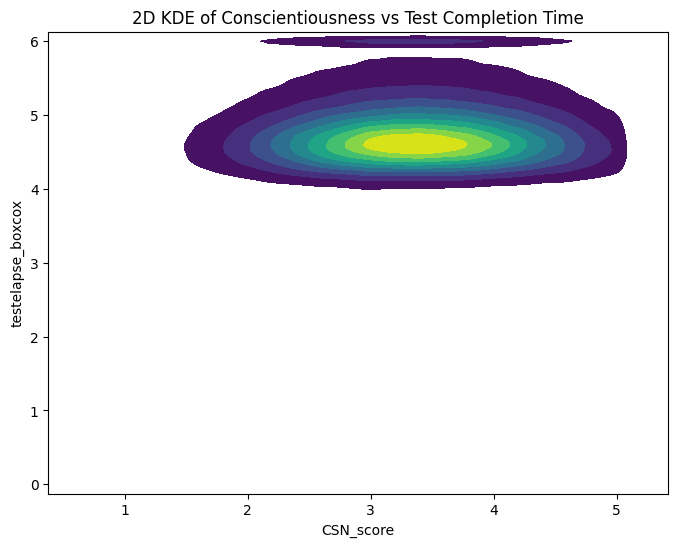

In [49]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df_new,
    x='CSN_score',
    y='testelapse_boxcox',
    fill=True,
    cmap='viridis',
    thresh=0.05
)
plt.title('2D KDE of Conscientiousness vs Test Completion Time')
plt.xlabel('CSN_score')
plt.ylabel('testelapse_boxcox')
plt.show()

In [71]:
# For log-transformed time
corr_log, p_log = pearsonr(df_new['CSN_score'], df_new['testelapse_log'])
print(f"Correlation (log): {corr_log:.3f}, p-value: {p_log:.4f}")

# For Box-Cox transformed time
corr_boxcox, p_boxcox = pearsonr(df_new['CSN_score'], df_new['testelapse_boxcox'])
print(f"Correlation (Box-Cox): {corr_boxcox:.3f}, p-value: {p_boxcox:.4f}")

Correlation (log): 0.025, p-value: 0.0000
Correlation (Box-Cox): 0.034, p-value: 0.0000


The p-value is not significant, proves that there is no significant relation between testelapse and conscientiousness.
Thus accepting our null hypothesis.

**H0:**There is no any significant association between Conscientiousness (CSN_score) and the time taken to complete the test (testelapse or testelapse_boxcox)

In [70]:
X = df_new['CSN_score']
y = df_new['testelapse_boxcox']
X_const = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      testelapse_boxcox   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1152.
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          1.88e-252
Time:                        19:10:35   Log-Likelihood:            -5.6618e+05
No. Observations:             1015341   AIC:                         1.132e+06
Df Residuals:                 1015339   BIC:                         1.132e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6569      0.002   2382.748      0.0

#### 2. Inter-Trait Relationships
H5: Extraversion (EXT_score) and Openness (OPN_score) are positively correlated.
Rationale: People who are outgoing may also be more open to new experiences.

**H0:** Extraversion (EXT_score) and Openness (OPN_score) are not positively correlated.

**H1:** Extraversion (EXT_score) and Openness (OPN_score) are positively correlated.

*Rationale:*  People who are outgoing may also be more open to new experiences.

Visualize the Relationship (Scatter Plot)

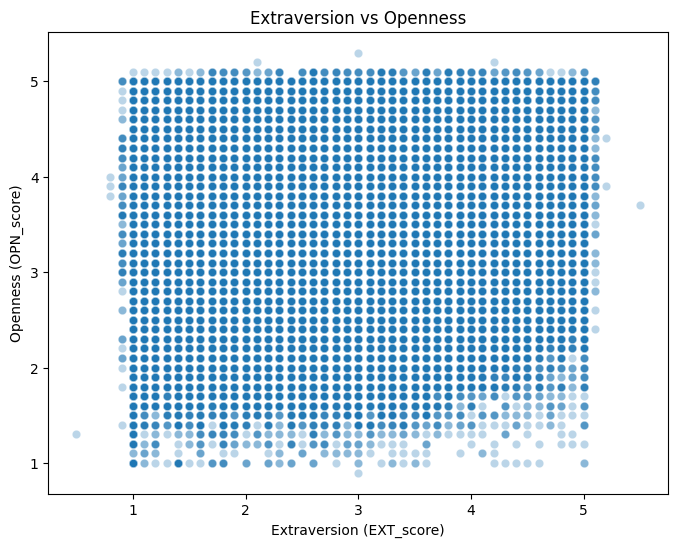

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['EXT_score'], y=df_new['OPN_score'], alpha=0.3)
plt.title('Extraversion vs Openness')
plt.xlabel('Extraversion (EXT_score)')
plt.ylabel('Openness (OPN_score)')
plt.show()

In [69]:
corr, p_value = pearsonr(df_new['EXT_score'], df_new['OPN_score'])
print(f"Pearson correlation: {corr:.3f}")
print(f"p-value: {p_value:.4f}")

if corr > 0 and p_value < 0.05:
    print("There is a significant positive correlation between Extraversion and Openness.\n H1 is accepted \nH1: Extraversion (EXT_score) and Openness (OPN_score) are positively correlated.  ")
else:
    print("No significant positive correlation found between Extraversion and Openness.")

Pearson correlation: 0.149
p-value: 0.0000
There is a significant positive correlation between Extraversion and Openness.
 H1 is accepted 
H1: Extraversion (EXT_score) and Openness (OPN_score) are positively correlated.  


#### 3. Group Differences
Participants with high Agreeableness (AGR_score) tend to have lower test completion times compared to those with low Agreeableness.
Rationale: Agreeable individuals may be more cooperative and focused during surveys.

**H0:** There is a no realtion between test completion time and Agreeableness. Participants with high Agreeableness (AGR_score) don't have any signigicant affect on completion times compared to those with low Agreeableness.

**H1:** Participants with high Agreeableness (AGR_score) tend to have lower test completion times compared to those with low Agreeableness. i.e there is a realtion betwen test completion time and Agreeableness

*Relation:*  Agreeable individuals may be more cooperative and focused during surveys.

1. Visualize the Relationship

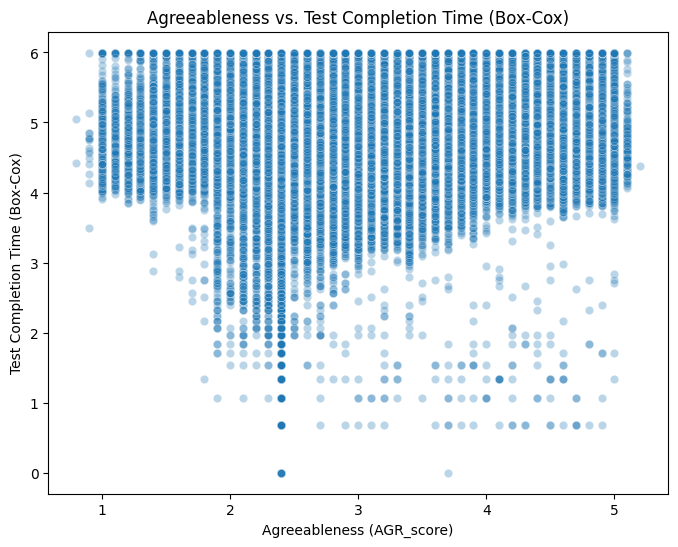

In [59]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['AGR_score'], y=df_new['testelapse_boxcox'], alpha=0.3)
plt.title('Agreeableness vs. Test Completion Time (Box-Cox)')
plt.xlabel('Agreeableness (AGR_score)')
plt.ylabel('Test Completion Time (Box-Cox)')
plt.show()

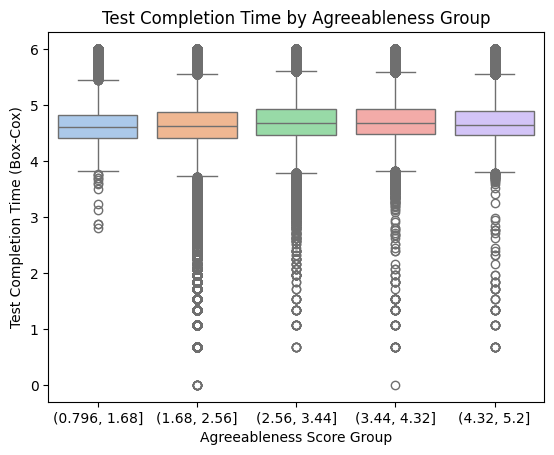

In [60]:
# boxplot by Agreeableness group
df_new['AGR_group'] = pd.cut(df_new['AGR_score'], bins=5)
sns.boxplot(x='AGR_group', y='testelapse_boxcox', data=df_new, palette='pastel')
plt.title('Test Completion Time by Agreeableness Group')
plt.xlabel('Agreeableness Score Group')
plt.ylabel('Test Completion Time (Box-Cox)')
plt.show()


2. Statistical Test

In [68]:
# Person Correlation
corr, p_value = pearsonr(df_new['AGR_score'], df_new['testelapse_boxcox'])
print(f"Pearson correlation: {corr:.3f}")
print(f"p-value: {p_value:.4f}")


Pearson correlation: 0.041
p-value: 0.0000


In [67]:
# Linear Regression
X = df_new['AGR_score']
y = df_new['testelapse_boxcox']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      testelapse_boxcox   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1672.
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:10:06   Log-Likelihood:            -5.6592e+05
No. Observations:             1015341   AIC:                         1.132e+06
Df Residuals:                 1015339   BIC:                         1.132e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6337      0.002   2112.582      0.0

Interpretation:

A negative and significant correlation (p < 0.05) supports the alternative hypothesis.
If the correlation is not significant, there is no evidence of a relationship.

Results:
Pearson correlation: 0.041
p-value: 0.0000
Result:

While the relationship is statistically significant, it is in the opposite direction of the hypothesis (higher Agreeableness is linked to slightly longer completion times), and the effect is so small as to be practically insignificant. Thus, there is no meaningful evidence that more agreeable individuals complete the survey more quickly.

Thus, Null Hypothesis is accepted. (H0): There is no relationship between Agreeableness and test completion time.